In [65]:
class Value:
    def __init__(self, value: int, _children=(), _op=''):
        self.value = value
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0 #no effect by default
    def __add__(self,b):
        return Value(self.value + b.value, _children=(self, b), _op= '+')
    def __mul__(self,b):
        return Value(self.value * b.value, _children=(self, b), _op='*')



In [66]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.value, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [73]:
a= Value(3)
b = Value(4)
c = a+b

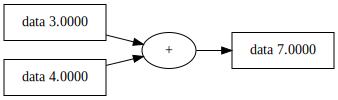

In [74]:
draw_dot(c)